<a href="https://colab.research.google.com/github/felipe24I/Entregas/blob/main/Parcial_3/punto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Parcial 3**

#**Punto 1**

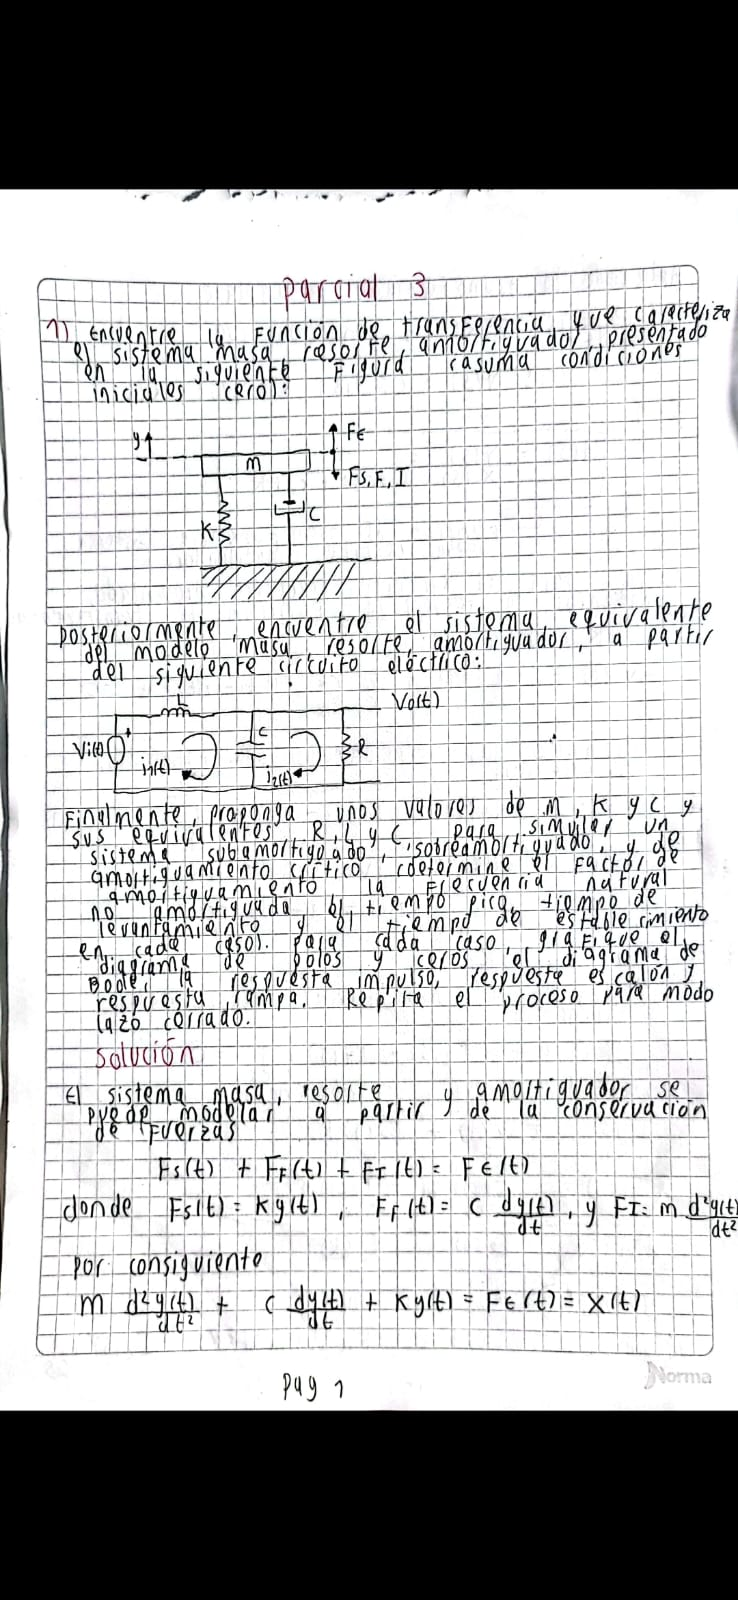

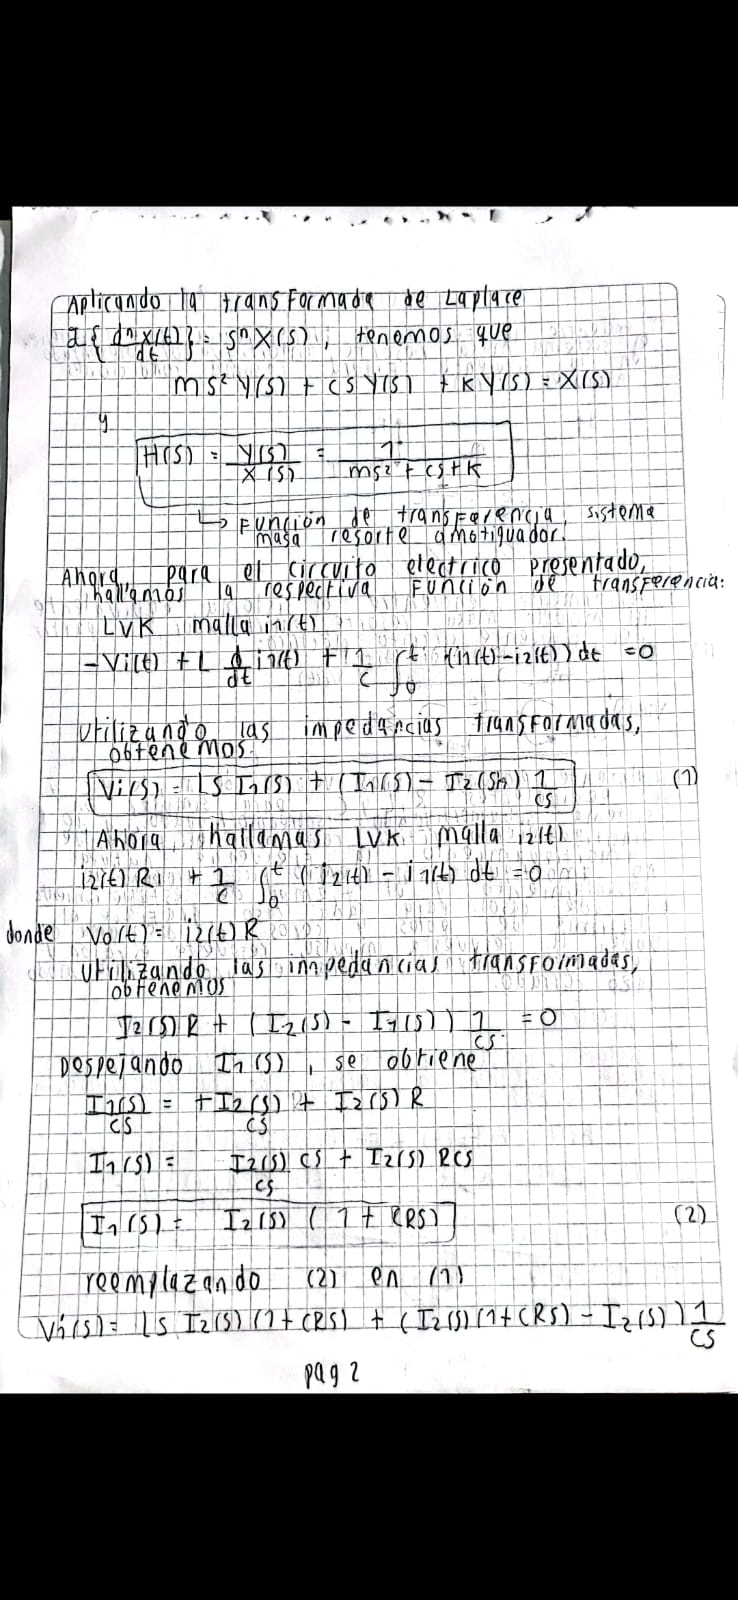

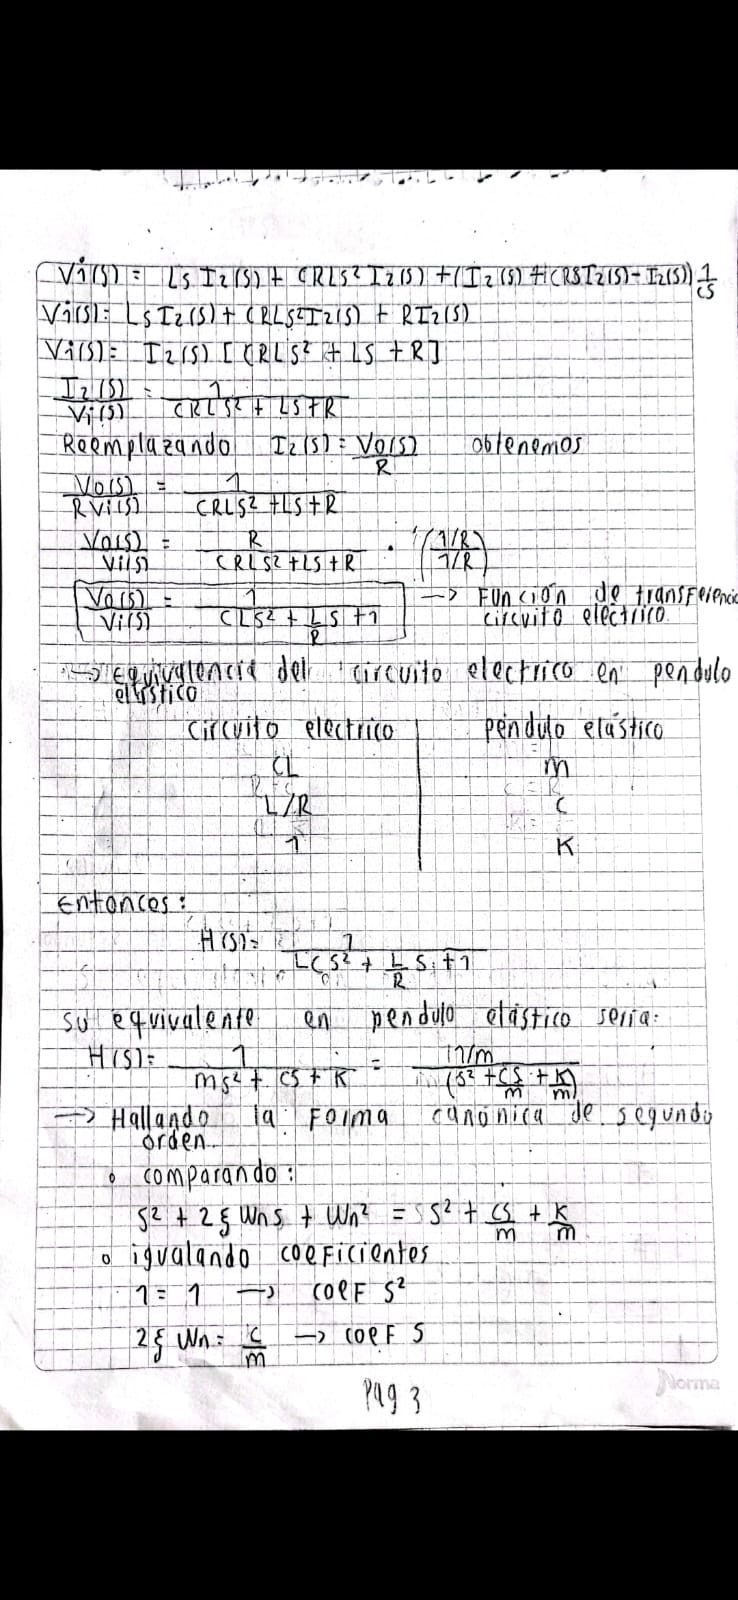

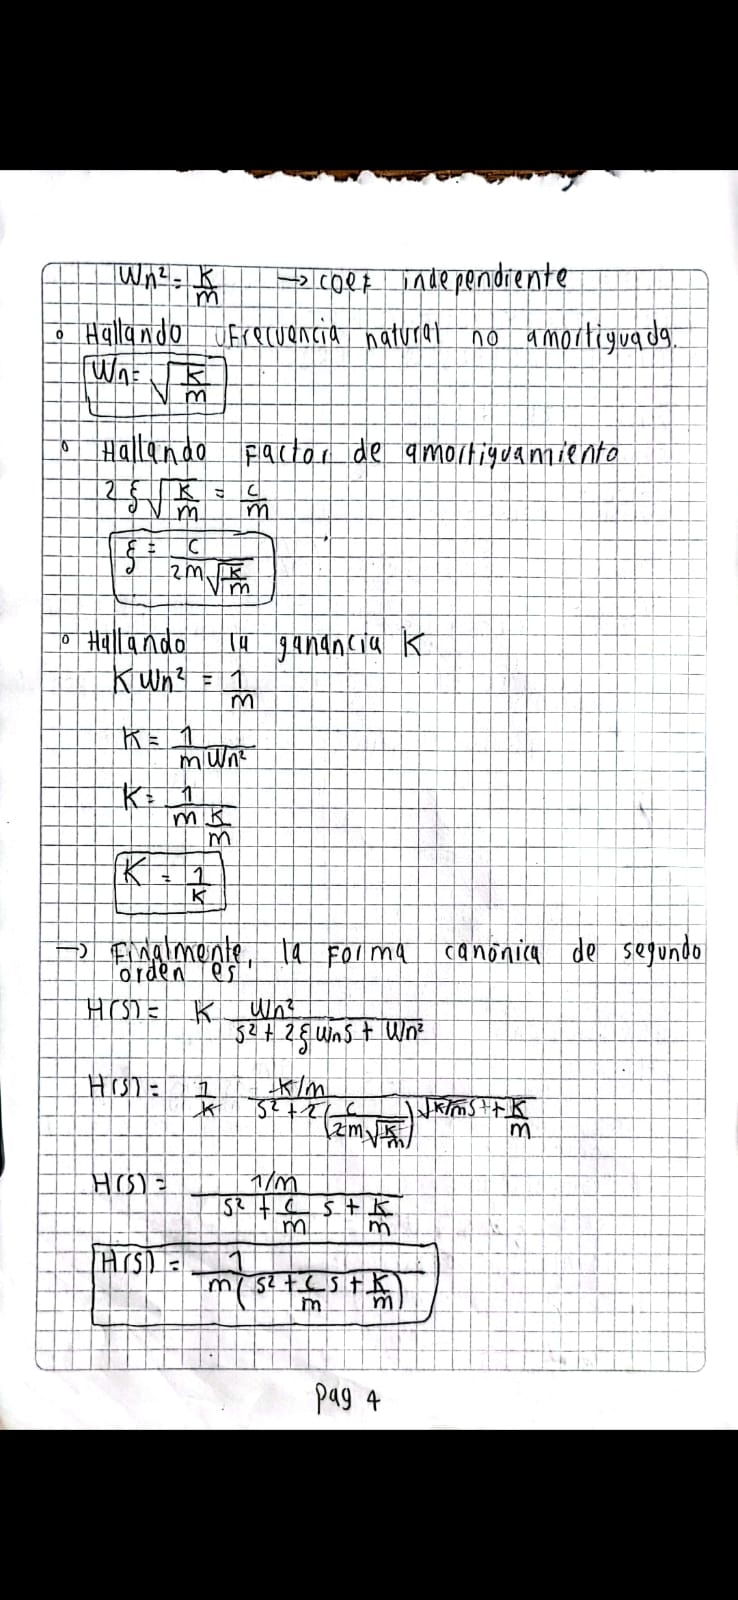

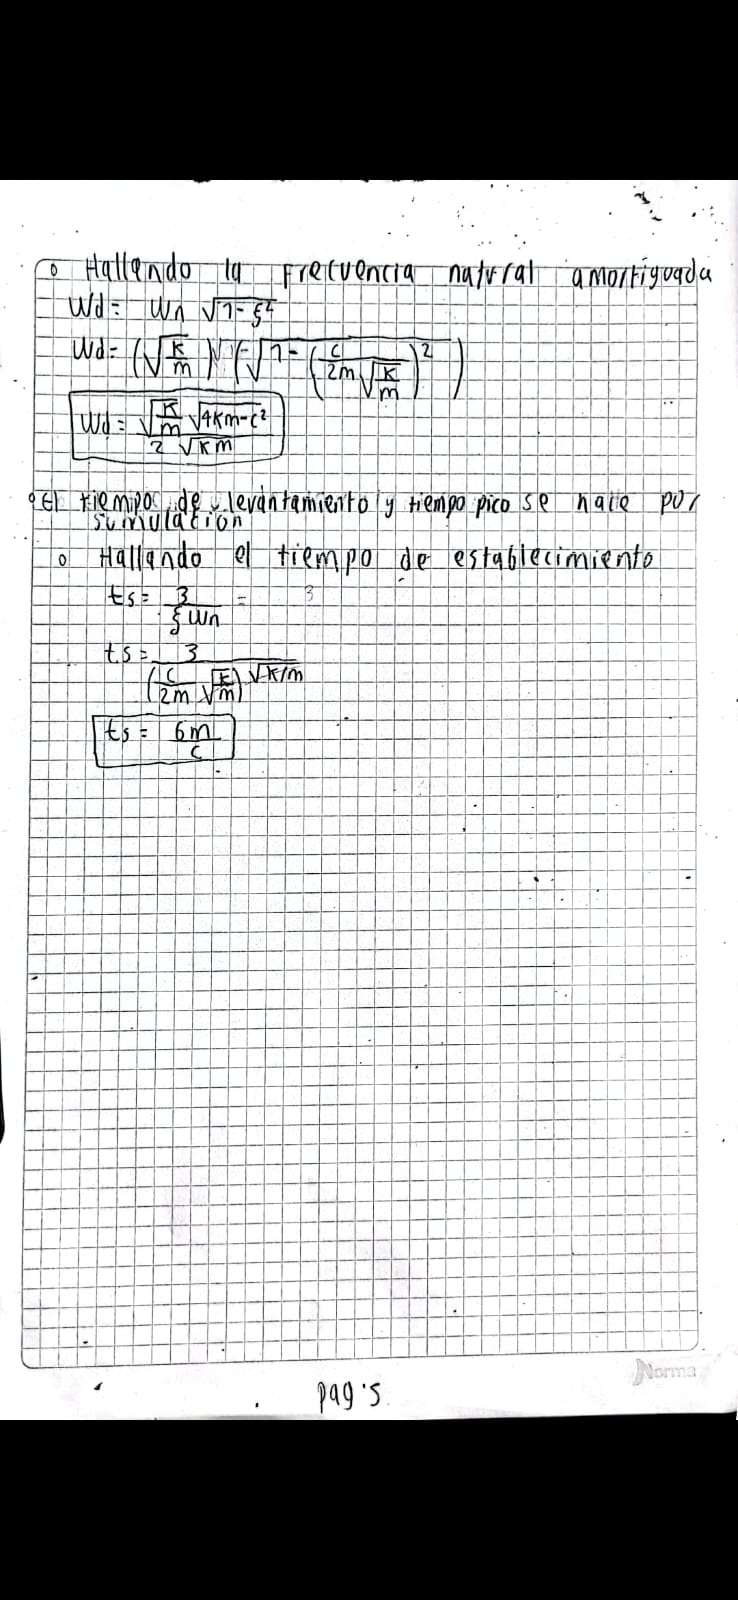

#**Simulación punto 1**

In [ ]:
!pip install sympy --upgrade #actualizar sympy para usar módulo de control

In [ ]:
pip install control

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()
#definiri variables
t, m, c, k = sym.symbols('t m c k', real=True,positive=True)
s = sym.symbols('s', complex=True)

Teniendo en cuenta la forma canónica:

$$H(s)=\frac{1}{a_2s^2+a_1s+a_0}$$

$$H(s)=K\frac{\omega_n^2}{s^2+2\xi \omega_ns+\omega_n^2}$$

In [ ]:
#forma canónica del slit
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*a2*sym.sqrt(ao/a2))
#función de transferencia
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
H

       1        
────────────────
  ⎛c⋅s   k    2⎞
m⋅⎜─── + ─ + s ⎟
  ⎝ m    m     ⎠

In [ ]:
#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

                      _____________
                     ╱      2      
                    ╱      c       
        1.0⋅ⅈ⋅√k⋅  ╱   - ───── + 1 
   c             ╲╱      4⋅k⋅m     
- ─── + ───────────────────────────
  2⋅m                √m            

Ahora, para sistema subamortiguado:

$$0<\xi<1$$

$$0<\frac{a_1}{2 a_2 \sqrt{\frac {a_0} {a_2}}}<1$$

$$0<\frac{c}{2 m\sqrt{\frac {k} {m}}}<1$$

Asumimos:

$$c=1 = \frac{L}{R}$$

$L = 1$, $R=1$

$$k=1$$

$$m=4 = CL$$

$C=4$

$$\xi = \frac{1}{4}=0.25$$

In [ ]:
#Reemplazando los valores
mck = {m: 4.0, c: 1.0, k: 1.0}
mck

{c: 1.0, k: 1.0, m: 4.0}

In [ ]:
## Polos y ceros
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.125 + 0.484122918275927*I
p2= -0.125 - 0.484122918275927*I
xi= 0.250000000000000
omega_n= 0.500000000000000


#**Tiempo de establecimiento**

In [ ]:
t_s = 6*m / c
print('El tiempo de establecimiento es de: ',t_s.subs(mck))

El tiempo de establecimiento es de:  24.0000000000000


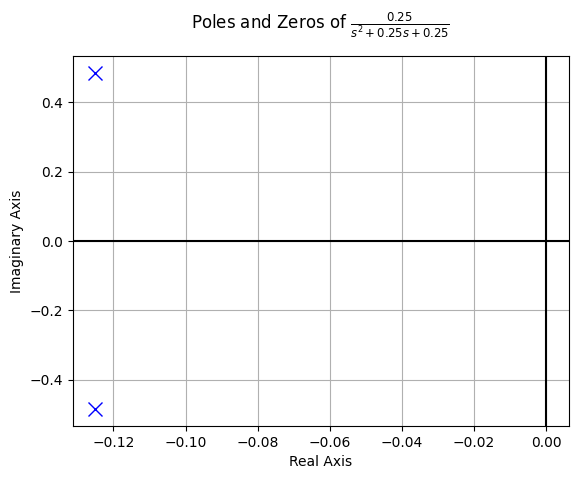

In [ ]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot, ramp_response_plot
import control as ctrl
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

#**Diagrama de bode**

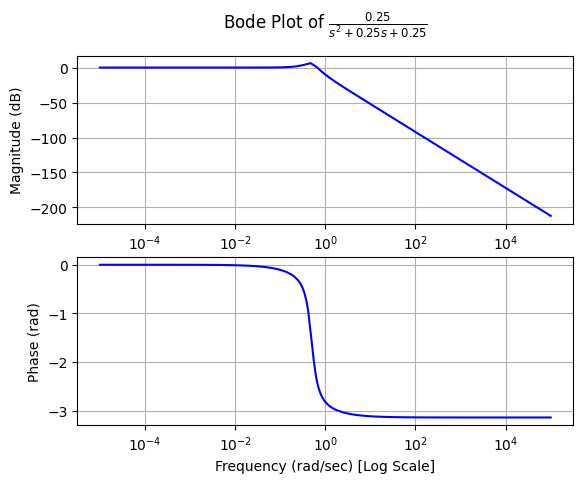

In [ ]:
bode_plot(tf1)

#**Respuesta impulso**

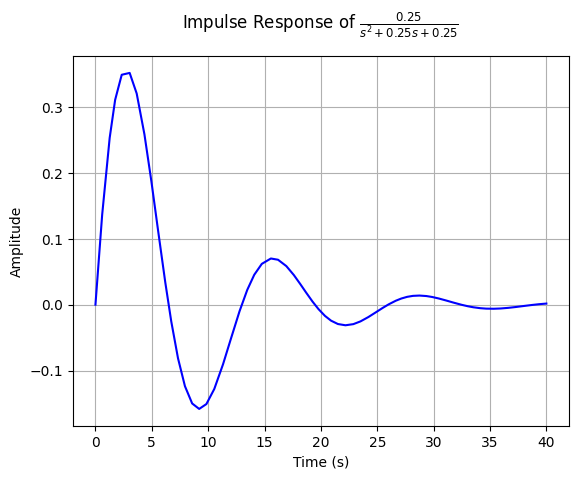

In [ ]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#**Tiempo pico**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import impulse, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [4, 1, 1]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = impulse((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

2.8282828282828287

#**Respuesta al escalón**

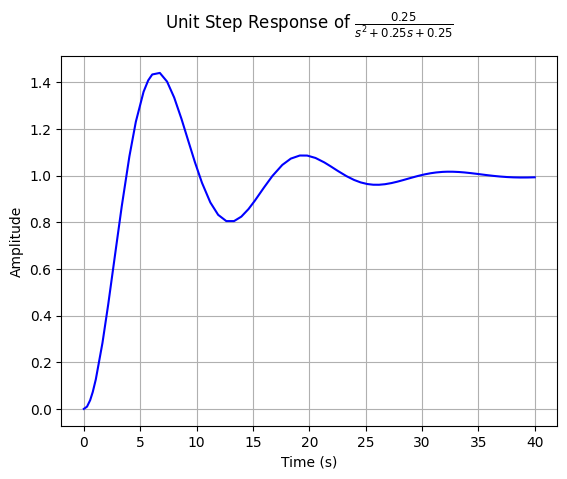

In [ ]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#**Tiempo pico**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import step, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [4, 1, 1]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = step((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

6.222222222222223

#**Respuesta rampa**

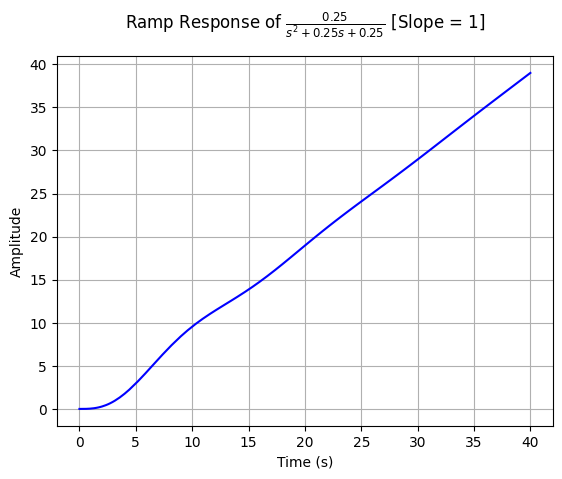

In [ ]:
ramp_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

Ahora, para sistema de amortiguamiento crítico:

$$\xi=1$$

$$\frac{a_1}{2 a_2 \sqrt{\frac {a_0} {a_2}}}=1$$

$$\frac{c}{2 m\sqrt{\frac {k} {m}}}=1$$

Asumimos:

$$c=2 = \frac{L}{R}$$

$L = 2$, $R=1$

$$k=1$$

$$m=1 = CL$$

$C=\frac{1}{2}$

$$\xi = \frac{2}{2}=1$$

In [ ]:
#Reemplazando los valores
mck = {m: 1.0, c: 2.0, k: 1.0}
mck

{c: 2.0, k: 1.0, m: 1.0}

In [ ]:
## Polos y ceros
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -1.00000000000000
p2= -1.00000000000000
xi= 1.00000000000000
omega_n= 1.00000000000000


In [ ]:
t_s2 = 6*m / c
print('El tiempo de establecimiento es de: ',t_s.subs(mck))

El tiempo de establecimiento es de:  3.00000000000000


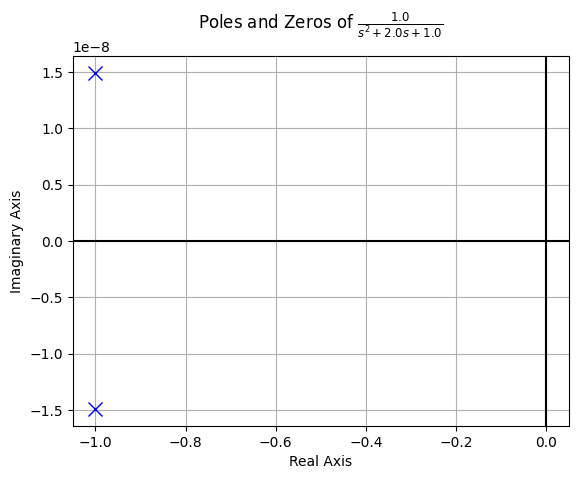

In [ ]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot, ramp_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

#**Diagrama de bode**

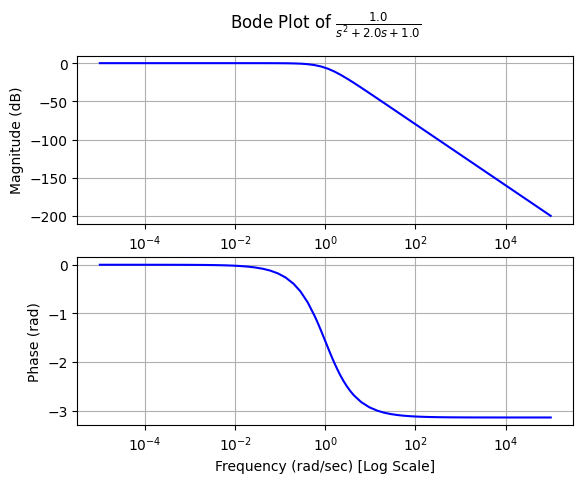

In [ ]:
bode_plot(tf1)

#**Respuesta impulso**

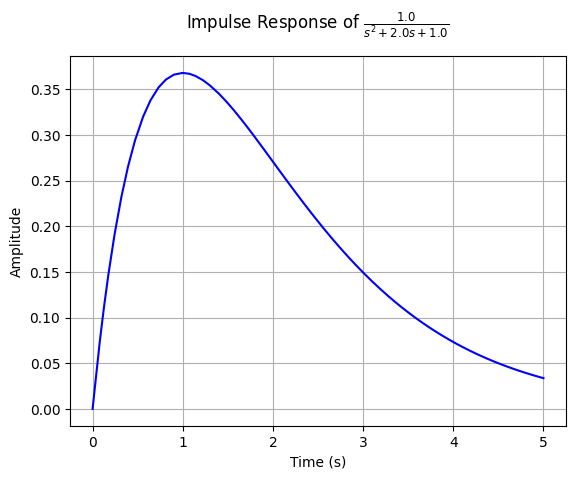

In [ ]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#**Tiempo pico**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import impulse, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [1, 2, 1]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = impulse((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

0.9898989898989898

#**Respuesta al escalón**

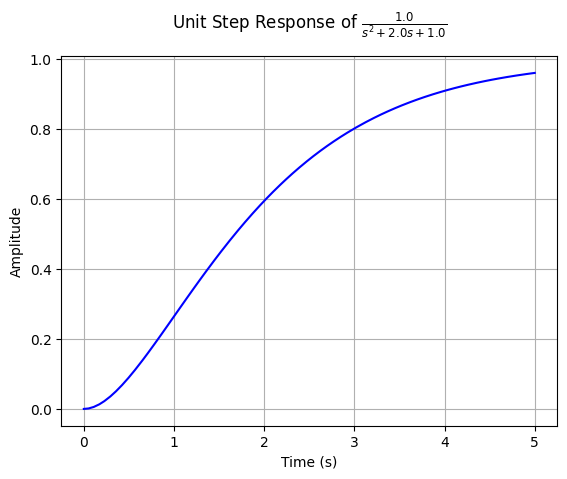

In [ ]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#**Respuesta rampa**

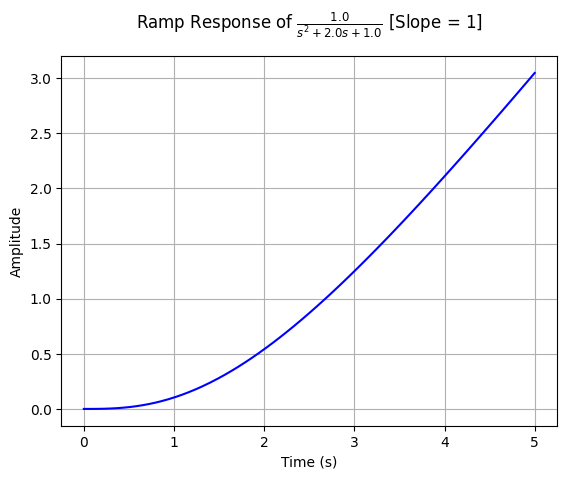

In [ ]:
ramp_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#**Función de transferencia para masa resorte amortiguado lazo cerrado**

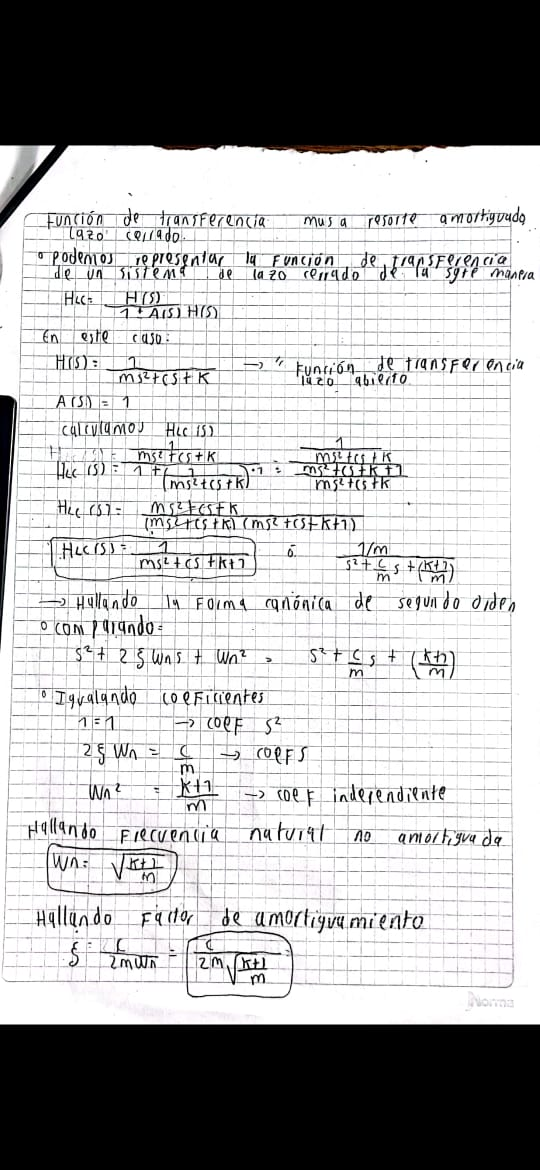

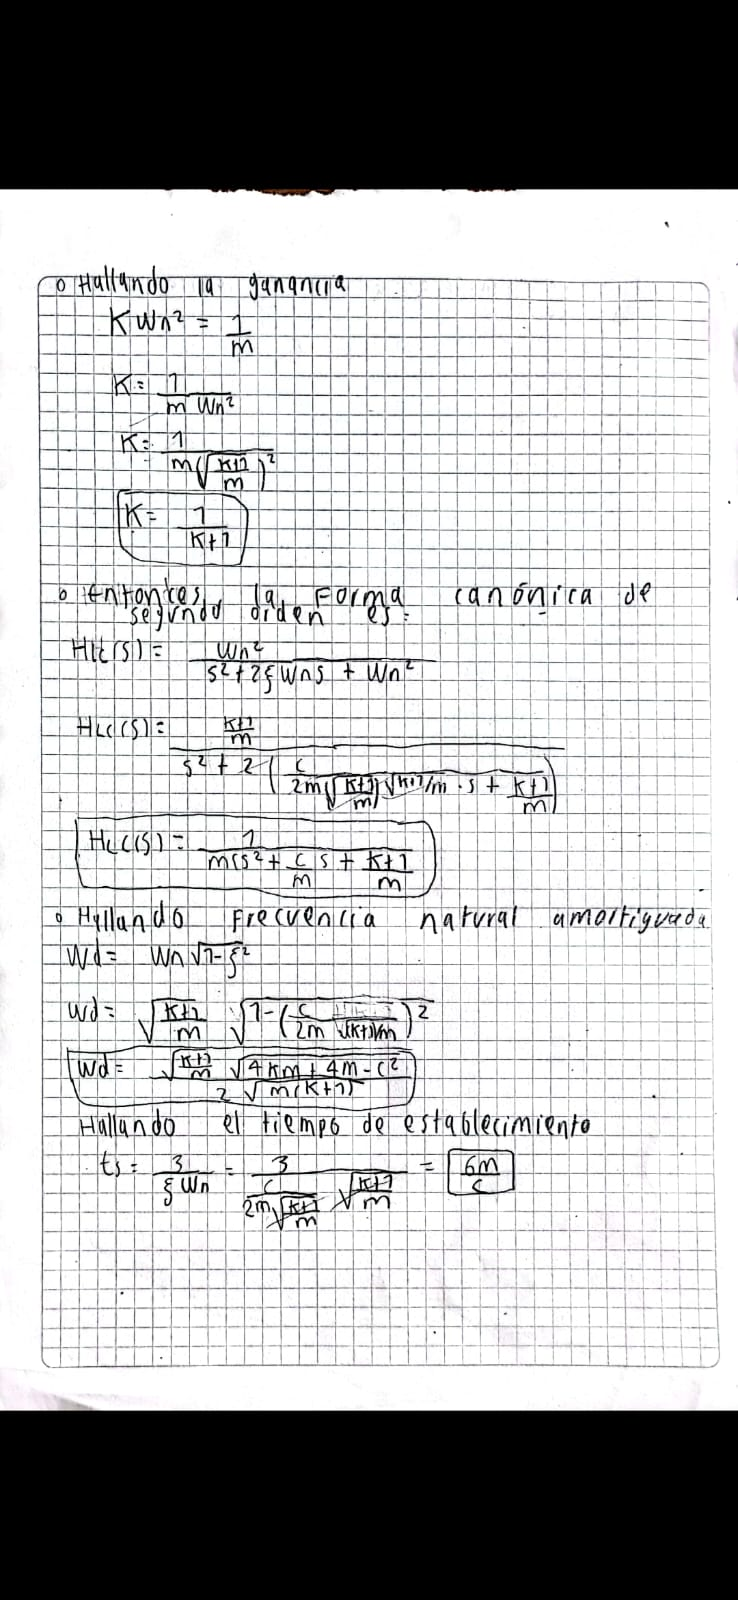

#**Simulación**

Teniendo en cuenta la forma canónica:

$$Hlc(s)=\frac{1}{a_2s^2+a_1s+a_0}$$

$$Hlc(s)=K\frac{\omega_n^2}{s^2+2\xi \omega_ns+\omega_n^2}$$

In [ ]:
#forma canónica del slit
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k + 1 # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*a2*sym.sqrt(ao/a2))
#función de transferencia
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
H

         1          
────────────────────
  ⎛c⋅s    2   k + 1⎞
m⋅⎜─── + s  + ─────⎟
  ⎝ m           m  ⎠

In [ ]:
#calcular polos
p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1

                             ___________________
                            ╱         2         
                _______    ╱         c          
        1.0⋅ⅈ⋅╲╱ k + 1 ⋅  ╱   - ─────────── + 1 
   c                    ╲╱      4⋅m⋅(k + 1)     
- ─── + ────────────────────────────────────────
  2⋅m                      √m                   

Ahora, para sistema subamortiguado:

$$0<\xi<1$$

$$0<\frac{c}{2 m\sqrt{\frac {k+1} {m}}}<1$$

Asumimos:

$$c=1 = \frac{L}{R}$$

$L = 1$, $R=1$

$$k=1$$

$$m=4 = CL$$

$C=4$

$$\xi = \frac{\sqrt{2}}{8}=0.17$$

In [ ]:
#Reemplazando los valores
mck = {m: 4.0, c: 1.0, k: 1.0}
mck

{c: 1.0, k: 1.0, m: 4.0}

In [ ]:
## Polos y ceros
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.125 + 0.695970545353753*I
p2= -0.125 - 0.695970545353753*I
xi= 0.176776695296637
omega_n= 0.707106781186548


In [ ]:
t_s2 = 6*m / c
print('El tiempo de establecimiento es de: ',t_s.subs(mck))

El tiempo de establecimiento es de:  24.0000000000000


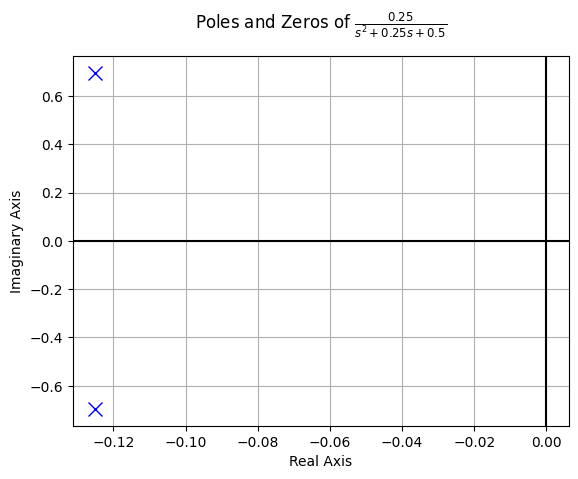

In [ ]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot, ramp_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

#**Diagrama de bode**

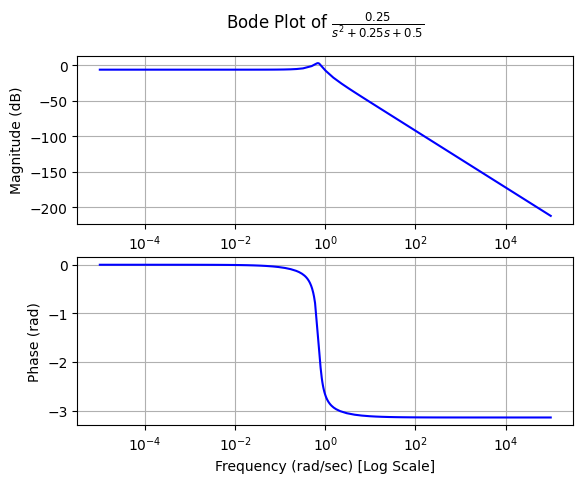

In [ ]:
bode_plot(tf1)

#**Respuesta impulso**

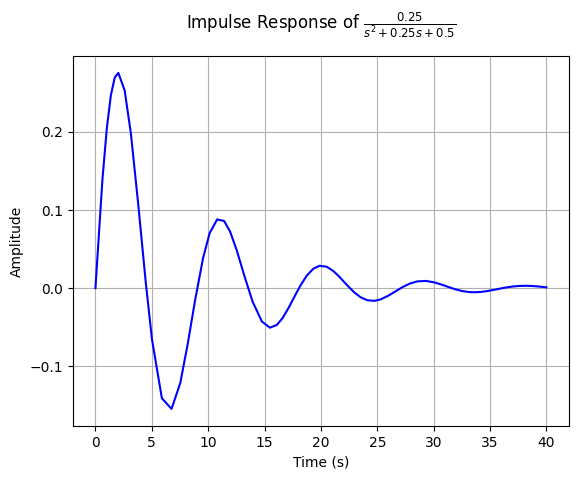

In [ ]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#**Tiempo pico**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import impulse, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [4, 1, 2]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = impulse((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

2.262626262626263

#**Respuesta al escalón**

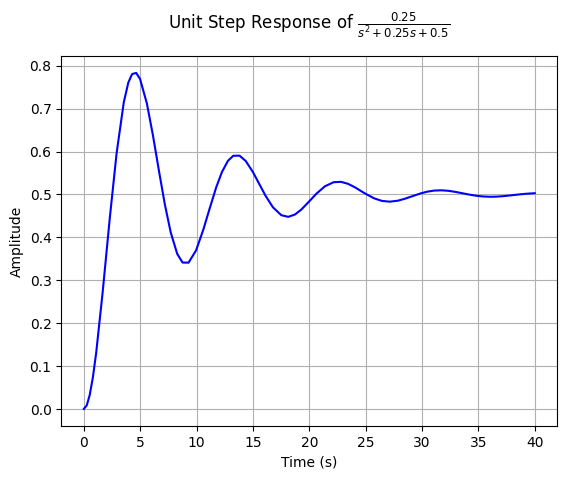

In [ ]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#**Tiempo pico**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import step, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [4, 1, 2]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = step((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

4.525252525252526

#**Respuesta rampa**

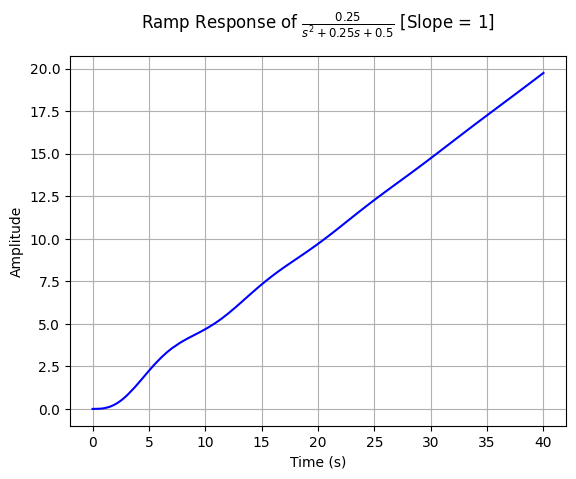

In [ ]:
ramp_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

Ahora, para sistema de amortiguamiento crítico:

$$\xi=1$$

$$\frac{a_1}{2 a_2 \sqrt{\frac {a_0} {a_2}}}=1$$

$$\frac{c}{2 m\sqrt{\frac {k+1} {m}}}=1$$

Asumimos:

$$c=4 = \frac{L}{R}$$

$L = 8$, $R=2$

$$k=1$$

$$m=2 = CL$$

$C=\frac{1}{4}$

$$\xi = \frac{4}{4}=1$$

In [ ]:
#Reemplazando los valores
mck = {m: 2.0, c: 4.0, k: 1.0}
mck

{c: 4.0, k: 1.0, m: 2.0}

In [ ]:
## Polos y ceros
print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -1.00000000000000
p2= -1.00000000000000
xi= 1.00000000000000
omega_n= 1.00000000000000


In [ ]:
t_s2 = 6*m / c
print('El tiempo de establecimiento es de: ',t_s.subs(mck))

El tiempo de establecimiento es de:  3.00000000000000


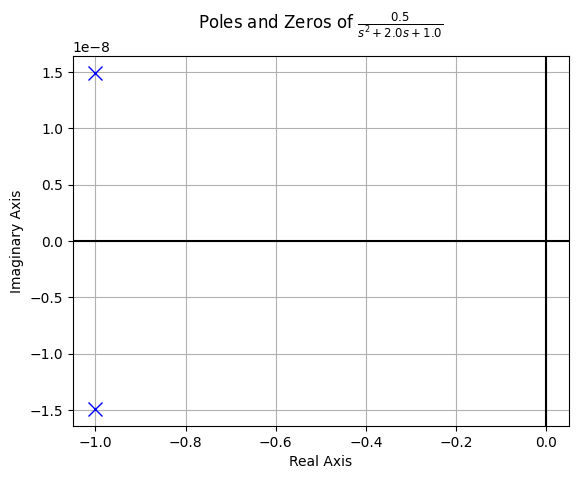

In [ ]:
#gráfica polos y ceros paquete de control de sympy
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot, ramp_response_plot
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

#**Diagrama de bode**

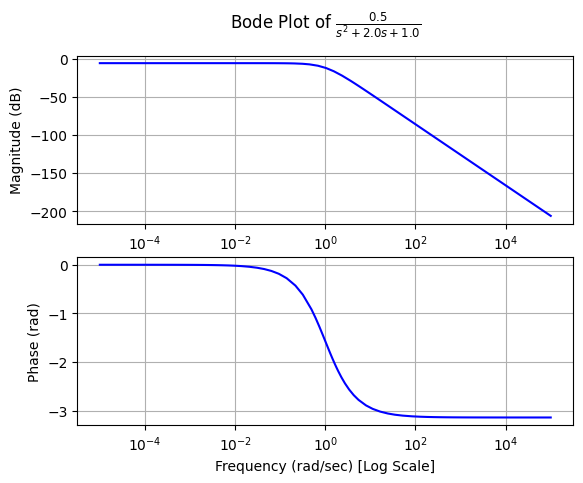

In [ ]:
bode_plot(tf1)

#**Respuesta impulso**

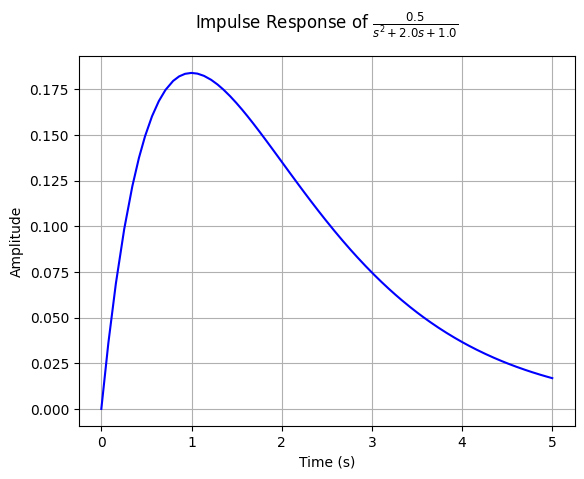

In [ ]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#**Tiempo pico**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import impulse, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [2, 4, 1]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = impulse((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

1.207045198818771

#**Respuesta al escalón**

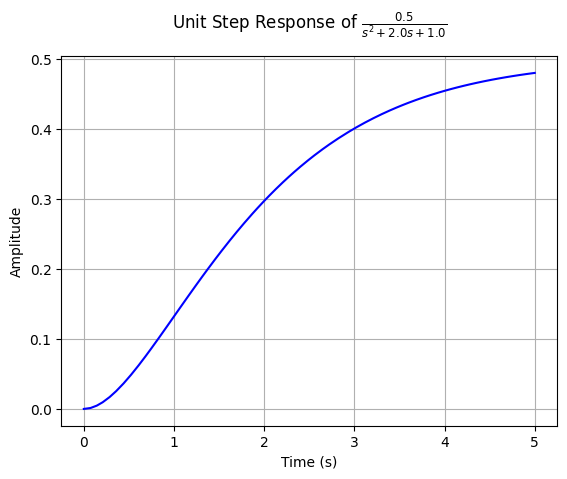

In [ ]:
step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

#**Respuesta rampa**

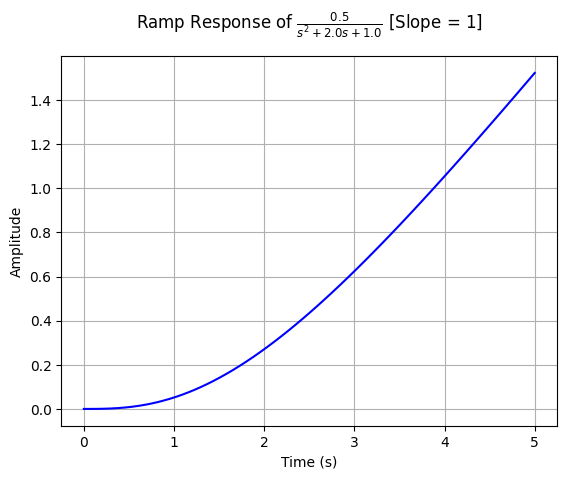

In [ ]:
ramp_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))